### demographics_static_clean.csv: combine races into three groups: white, black or american, and other
### inpatient_eth: original features + AgeBand + AgeBin
### inpatient_eth2: inpatient_eth features + all demographic features be encoded as labels (ie. 0,1,2..)
### inpatient_eth3: inpatient_eth2 features + all demographic features be encoded as one-hot 

In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [2]:
path = '/home/bhatti/dataset/VCHAMPS/demographics_static_train.csv'
demographics_static_train = pd.read_csv(path).iloc[:,1:]
demographics_static_train.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [3]:
demographics_static_train.shape

(133252, 5)

Drop veteran flag == 0 (159 rows)

In [3]:
demographics_static_train = demographics_static_train[demographics_static_train['Veteran flag'] == 'Yes']
demographics_static_train.shape

(133093, 5)

In [30]:
pd.DataFrame(demographics_static_train['Races'].value_counts())

,Races
White,85098
Not specified (no value),22451
Black or African American,16669
Other,6497
White ; Other,1429
Asian,431
Black or African American ; Other,267
Black or African American ; White,198
Asian ; Other,17
White ; Asian,16


In [4]:
races = ['White', 'Black or African American', 'Asian', 'Other']
ethnicities = ['Hispanic or Latino']

In [6]:
def races_combine(data):
    for i in range(len(data['Races'])):
        race = data['Races'].iloc[i]
        eth = data['Ethnicity'].iloc[i]
        if (race not in races) and (eth not in ethnicities):
            if  data['Races'].iloc[i] == 'White ; Other':
                data['Races'].iloc[i] = 'White'
            elif data['Races'].iloc[i] == 'Black or African American ; Other':
                data['Races'].iloc[i] = 'Black or African American'
            elif data['Races'].iloc[i] == 'Asian ; Other':
                data['Races'].iloc[i] = 'Asian'
            elif data['Races'].iloc[i] == '(Censored)':
                data['Races'].iloc[i] = 'Other'
            elif data['Races'].iloc[i] == 'Not specified (no value)':
                data['Races'].iloc[i] = 'Other'
            elif data['Races'].iloc[i] == 'Black or African American ; White':
                data['Races'].iloc[i] = 'Black or African American'
            elif data['Races'].iloc[i] == 'Black or African American ; Asian':
                data['Races'].iloc[i] = 'Asian'
            elif data['Races'].iloc[i] == 'White ; Asian':
                data['Races'].iloc[i] = 'Asian'
            elif data['Races'].iloc[i] == 'White ; Asian ; Other':
                data['Races'].iloc[i] = 'Asian'
            elif data['Races'].iloc[i] == 'Black or African American ; White ; Asian':
                data['Races'].iloc[i] = 'Asian'
            elif data['Races'].iloc[i] == 'Black or African American ; White ; Other':
                data['Races'].iloc[i] = 'Black or African American'
        elif (race not in races) and (eth in ethnicities):
            data['Races'].iloc[i] = eth
        
    return data



In [7]:
demographics_static_train2 = races_combine(demographics_static_train)

/tmp/ipykernel_29523/3788075064.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].iloc[i] = 'Other'
/tmp/ipykernel_29523/3788075064.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].iloc[i] = 'White'
/tmp/ipykernel_29523/3788075064.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].iloc[i] = eth
/tmp/ipykernel_29523/3788075064.py:17: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
demographics_static_train2['Races'].value_counts()

White                        86443
Other                        28792
Black or African American    17128
Asian                          469
Hispanic or Latino             261
Name: Races, dtype: int64

## Save cleaned demographic static
Combined Ethinicity and Races columns
Drop veteran flag == 'No'

In [44]:
#demographics_static_train.to_csv('/home/daisy/FDA_Dataset/demographics_static_clean.csv')

## Convert Formats
We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

In [9]:
path = '/home/daisy/FDA_Dataset/inpatients_with_readm.csv'
inpatient_admissions_train = pd.read_csv(path).iloc[:,1:]
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho,0


In [46]:
inpatient_admissions_train['Died during admission'].value_counts()

No     506345
Yes     16395
Name: Died during admission, dtype: int64

In [47]:
inpatient_admissions_train['Hospital readmission'].value_counts()

1    438200
0     84540
Name: Hospital readmission, dtype: int64

In [10]:
path = '/home/daisy/FDA_Dataset/demographics_static_clean.csv'
demographics_static_clean = pd.read_csv(path).iloc[:,1:]
demographics_static_clean.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Other,Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [6]:
pd.DataFrame(demographics_static_clean['Gender'].value_counts())

,Gender
Male,129777
Female,3475


In [43]:
pd.DataFrame(inpatient_admissions_train['Died during admission'].value_counts())

,Died during admission
No,506345
Yes,16395


In [44]:
pd.DataFrame(inpatient_admissions_train['Hospital readmission'].value_counts())

,Hospital readmission
1,438200
0,84540


In [40]:
pd.DataFrame(demographics_static_clean.Races.value_counts())

,Races
White,86809
Other,29474
Black or African American,16969


In [41]:
pd.DataFrame(demographics_static_clean.Ethnicity.value_counts())

,Ethnicity
Not Hispanic or Latino,102367
Not specified,26486
Hispanic or Latino,4399


In [42]:
pd.DataFrame(demographics_static_clean['Veteran flag'].value_counts())

,Veteran flag
Yes,133093
No,159


In [11]:
def age_category(data):
    data.loc[(data['Age at admission'] > 20) & (data['Age at admission'] <= 40), 'AgeBin'] = 0
    data.loc[(data['Age at admission'] > 40) & (data['Age at admission'] <= 60), 'AgeBin'] = 1
    data.loc[(data['Age at admission'] > 60) & (data['Age at admission'] <= 80), 'AgeBin'] = 2
    data.loc[(data['Age at admission'] > 80) & (data['Age at admission'] <= 110), 'AgeBin'] = 3
    return data
inpatient_admissions_train = age_category(inpatient_admissions_train)
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission,AgeBin
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,No,No,NaN,Yes,Utah,0,2.0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,No,Yes,No,No,North Carolina,1,3.0
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,No,No,NaN,No,North Carolina,1,3.0
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,No,Yes,NaN,Yes,Florida,0,2.0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,No,No,NaN,NaN,Idaho,0,3.0


In [12]:
inpatient_admissions_train['Died during admission'].replace(['No','Yes'],[0,1],inplace=True)

In [13]:
inpatient_admissions_train[['AgeBin', 'Died during admission']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='AgeBin', ascending=True)

,AgeBin,Died during admission
0,0.0,0.005728
1,1.0,0.010273
2,2.0,0.028539
3,3.0,0.063845


In [14]:
demographics_static_clean['Races'].value_counts()

White                        86443
Other                        28792
Black or African American    17128
Asian                          469
Hispanic or Latino             261
Name: Races, dtype: int64

In [15]:
demographics_static_clean['Veteran flag'].value_counts()

Yes    133093
Name: Veteran flag, dtype: int64

In [16]:
demographics_static_clean['Gender'].value_counts()

Male      129653
Female      3440
Name: Gender, dtype: int64

In [17]:
inpatient_enth = inpatient_admissions_train.merge(demographics_static_clean, how = 'left', suffixes=(' ', ' '), on = 'Internalpatientid')
inpatient_enth.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Hospital readmission,AgeBin,Ethnicity,Gender,Races,Veteran flag
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,No,NaN,Yes,Utah,0,2.0,Not Hispanic or Latino,Male,White,Yes
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,Yes,No,No,North Carolina,1,3.0,Not Hispanic or Latino,Male,White,Yes
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,No,NaN,No,North Carolina,1,3.0,Not Hispanic or Latino,Male,White,Yes
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,Yes,NaN,Yes,Florida,0,2.0,Not Hispanic or Latino,Male,Black or African American,Yes
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,No,NaN,NaN,Idaho,0,3.0,Not specified,Male,Other,Yes


In [18]:
from sklearn import preprocessing
label =preprocessing.LabelEncoder()
def label_encode(dataset):
    dataset['Gender_Code'] = label.fit_transform(dataset['Gender'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['Races_Code'] = label.fit_transform(dataset['Races'])
    return dataset
inpatient_enth2 = label_encode(inpatient_enth)
inpatient_enth2.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,State,Hospital readmission,AgeBin,Ethnicity,Gender,Races,Veteran flag,Gender_Code,AgeBin_Code,Races_Code
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,Utah,0,2.0,Not Hispanic or Latino,Male,White,Yes,1,2,4
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,North Carolina,1,3.0,Not Hispanic or Latino,Male,White,Yes,1,3,4
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,North Carolina,1,3.0,Not Hispanic or Latino,Male,White,Yes,1,3,4
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,Florida,0,2.0,Not Hispanic or Latino,Male,Black or African American,Yes,1,2,1
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,Idaho,0,3.0,Not specified,Male,Other,Yes,1,3,3


## Perform Exploratory Analysis with Statistics¶

In [19]:
orig_cols = ['Gender', 'Races', 'AgeBin']

for x in orig_cols:
    print('Survival Correlation by:', x)
    print(inpatient_enth[[x, 'Died during admission']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

    print('Readmission Correlation by:', x)
    print(inpatient_enth[[x, 'Hospital readmission']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

Survival Correlation by: Gender


   Gender  Died during admission
0  Female               0.018131
1    Male               0.031798
---------- 

Readmission Correlation by: Gender
   Gender  Hospital readmission
0  Female              0.853730
1    Male              0.837866
---------- 

Survival Correlation by: Races
                       Races  Died during admission
0                      Asian               0.037849
1  Black or African American               0.021280
2         Hispanic or Latino               0.043668
3                      Other               0.067914
4                      White               0.028383
---------- 

Readmission Correlation by: Races
                       Races  Hospital readmission
0                      Asian              0.809429
1  Black or African American              0.869337
2         Hispanic or Latino              0.806769
3                      Other              0.764717
4                      White              0.841272
---------- 

Survival Correlation by: AgeBin
   

In [20]:
data_dummy = pd.get_dummies(inpatient_enth[orig_cols])
data_dummy.head()

,AgeBin,Gender_Female,Gender_Male,Races_Asian,Races_Black or African American,Races_Hispanic or Latino,Races_Other,Races_White
0,2.0,0,1,0,0,0,0,1
1,3.0,0,1,0,0,0,0,1
2,3.0,0,1,0,0,0,0,1
3,2.0,0,1,0,1,0,0,0
4,3.0,0,1,0,0,0,1,0


In [21]:
inpatient_enth3 = pd.concat([inpatient_enth,data_dummy],axis = 1)
inpatient_enth3.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,AgeBin_Code,Races_Code,AgeBin,Gender_Female,Gender_Male,Races_Asian,Races_Black or African American,Races_Hispanic or Latino,Races_Other,Races_White
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,2,4,2.0,0,1,0,0,0,0,1
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,3,4,3.0,0,1,0,0,0,0,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,3,4,3.0,0,1,0,0,0,0,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,2,1,2.0,0,1,0,1,0,0,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,3,3,3.0,0,1,0,0,0,1,0


#### Demographic has a high correlation with readmission

In [63]:
inpatient_enth.columns

Index(['Internalpatientid', 'Age at admission', 'Admission date',
       'Discharge date', 'Admitting unit service', 'Discharging unit service',
       'Admitting specialty', 'Discharging specialty',
       'First listed discharge diagnosis icd10 subcategory',
       'Second listed discharge diagnosis icd10 subcategory',
       'Discharge disposition', 'Died during admission',
       'Outpatientreferralflag', 'Serviceconnectedflag', 'Agentorangeflag',
       'State', 'Hospital readmission', 'AgeBin', 'Ethnicity', 'Gender',
       'Races', 'Veteran flag', 'Gender_Code', 'AgeBin_Code', 'Races_Code'],
      dtype='object')

In [22]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
target = 'Died during admission'
target2 = 'Hospital readmission'
data  = inpatient_enth

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Hispanic or Latino')])

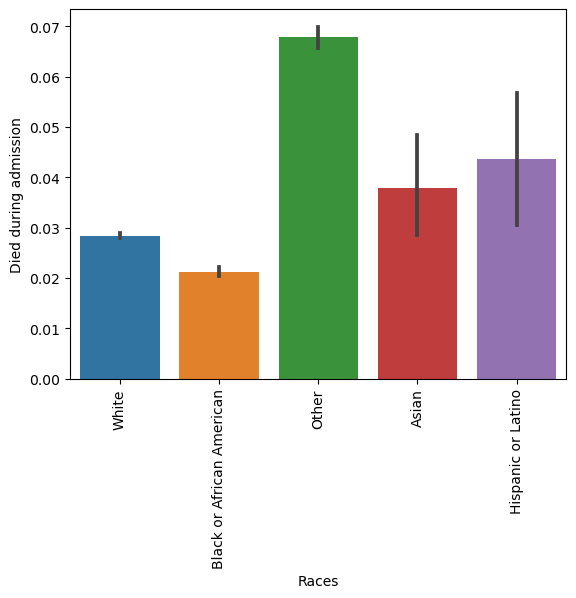

In [23]:
sns.barplot(x = 'Races', y = target,data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Hispanic or Latino')])

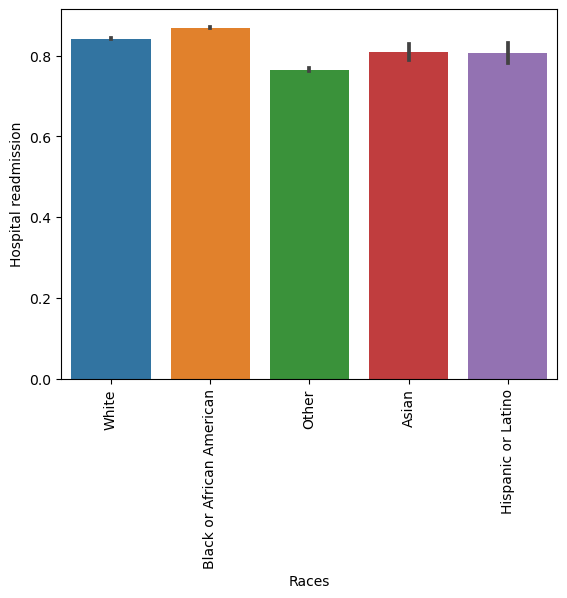

In [97]:
sns.barplot(x = 'Races', y = target2,data=data)
plt.xticks(rotation=90)

<Axes: xlabel='Gender', ylabel='Died during admission'>

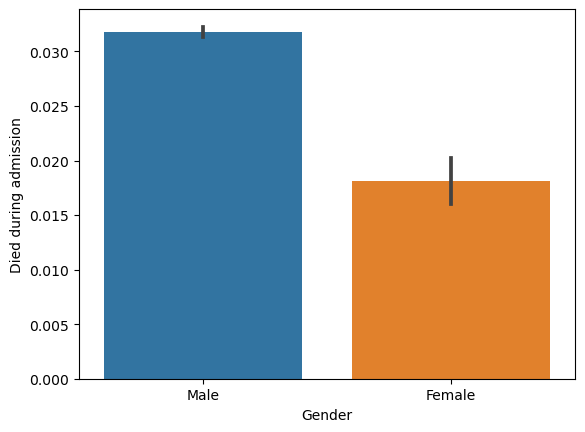

In [24]:
sns.barplot(x = 'Gender', y = target,data=data)

<Axes: xlabel='AgeBin', ylabel='Died during admission'>

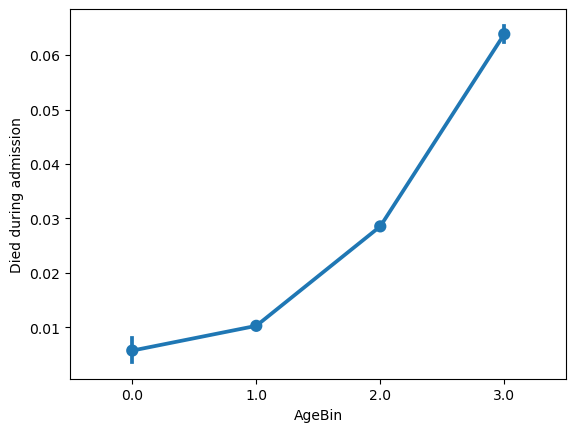

In [25]:
sns.pointplot(x = 'AgeBin', y = target,  data=data)

Text(0.5, 1.0, 'Age vs Races Readmission Comparison')

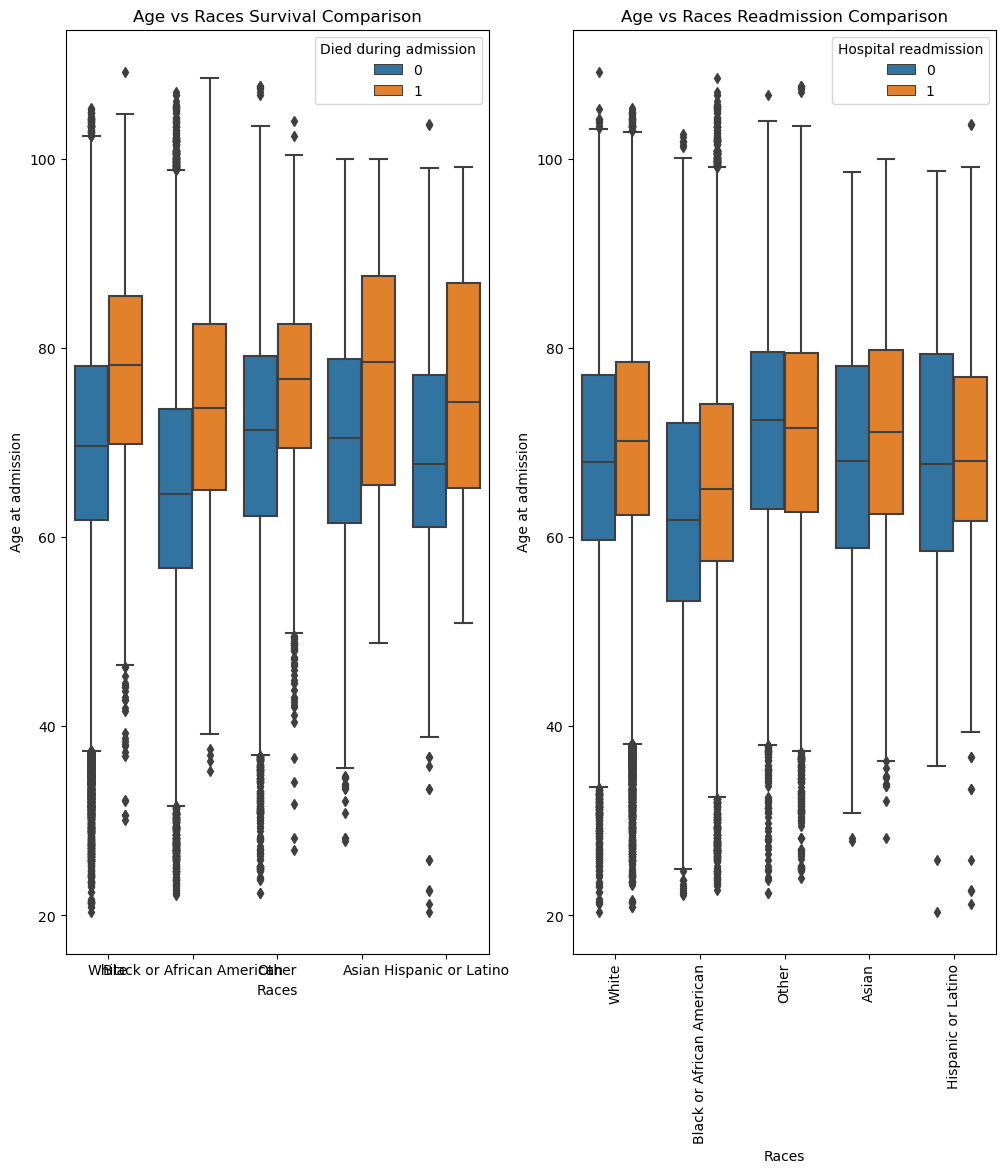

In [26]:
fig, (axis1, axis2)= plt.subplots(1,2,figsize=(12,12))

sns.boxplot(x = 'Races', y='Age at admission', hue = target, data = data, ax = axis1)
plt.xticks(rotation=90)
axis1.set_title('Age vs Races Survival Comparison')

sns.boxplot(x = 'Races', y='Age at admission', hue = target2, data = data, ax = axis2)
plt.xticks(rotation=90)
axis2.set_title('Age vs Races Readmission Comparison')


[Text(0.5, 1.0, 'Age vs Mortality Readmission Comparison')]

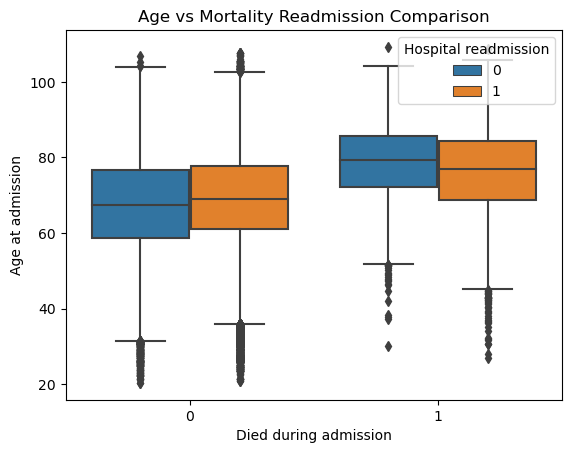

In [27]:
sns.boxplot(x = target, y='Age at admission', hue = target2, data = data).set(title = 'Age vs Mortality Readmission Comparison')

Text(0.5, 1.0, 'Age vs Gender Readmission Comparison')

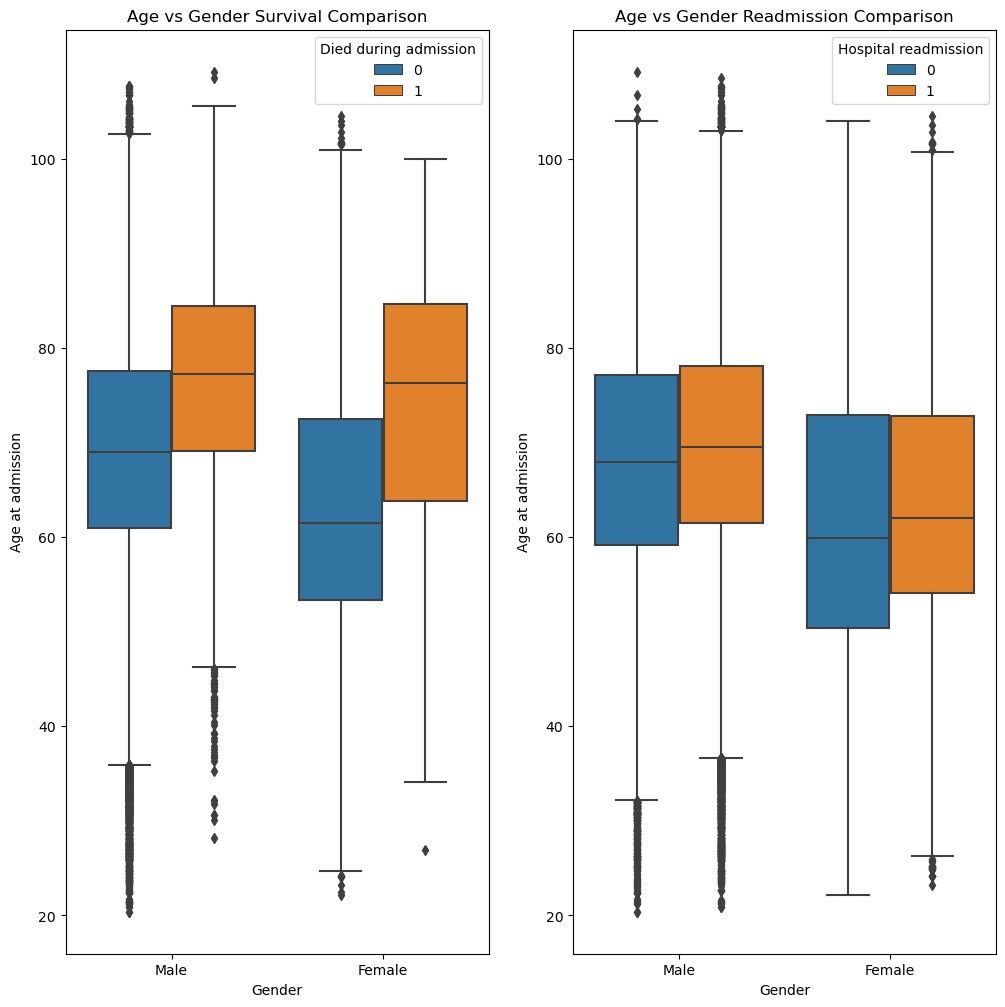

In [28]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(12,12))

sns.boxplot(x = 'Gender', y='Age at admission', hue = target, data = data, ax = axis1)
axis1.set_title('Age vs Gender Survival Comparison')

sns.boxplot(x = 'Gender', y ='Age at admission', hue = target2, data = data, ax = axis2)
axis2.set_title('Age vs Gender Readmission Comparison')

<Axes: xlabel='Gender', ylabel='Hospital readmission'>

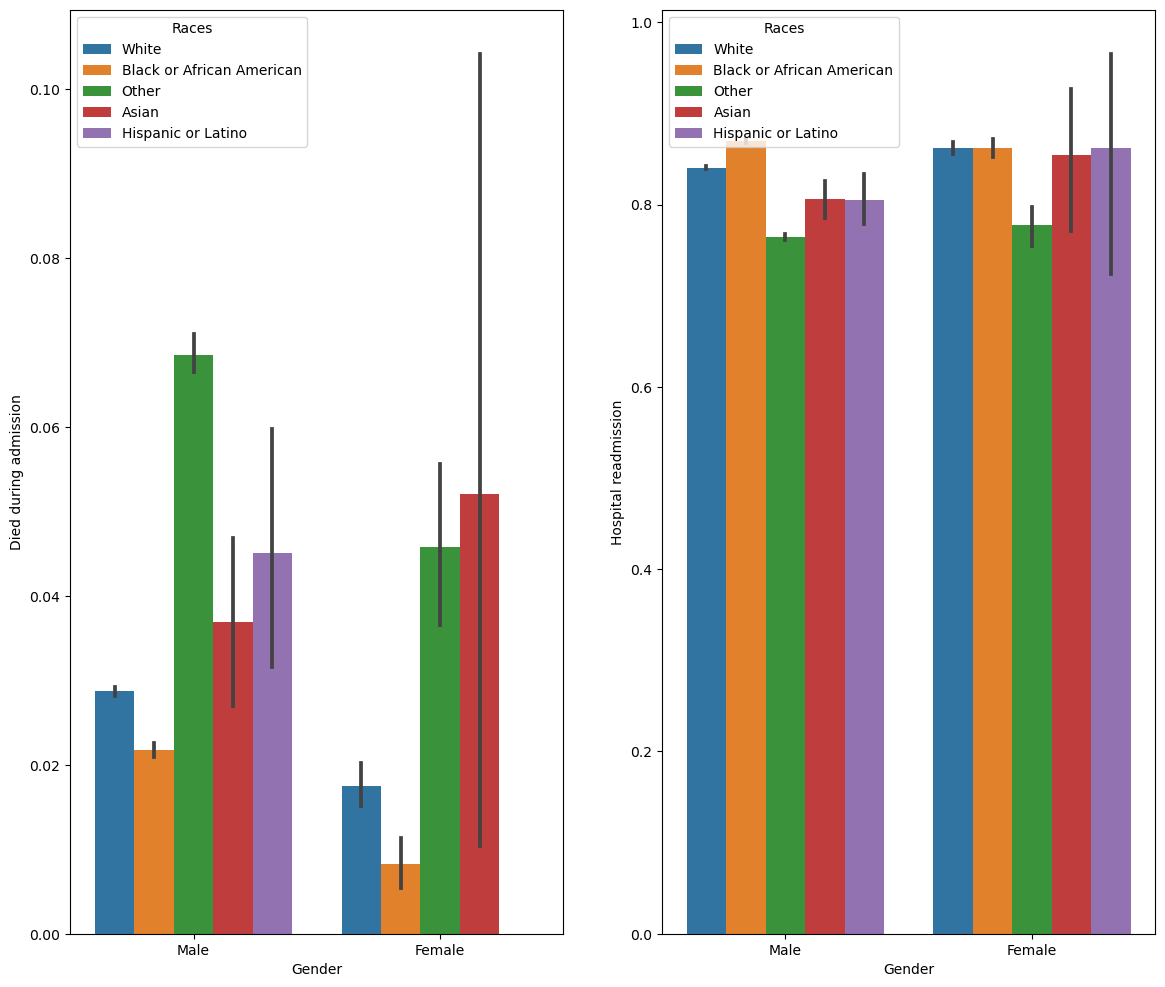

In [83]:
fig, qaxis = plt.subplots(1,2,figsize=(14,12))

sns.barplot(x = 'Gender', y = target, hue = 'Races', data=data, ax = qaxis[0])

sns.barplot(x = 'Gender', y = target2, hue = 'Races', data=data, ax  = qaxis[1])

<Axes: xlabel='AgeBin', ylabel='Hospital readmission'>

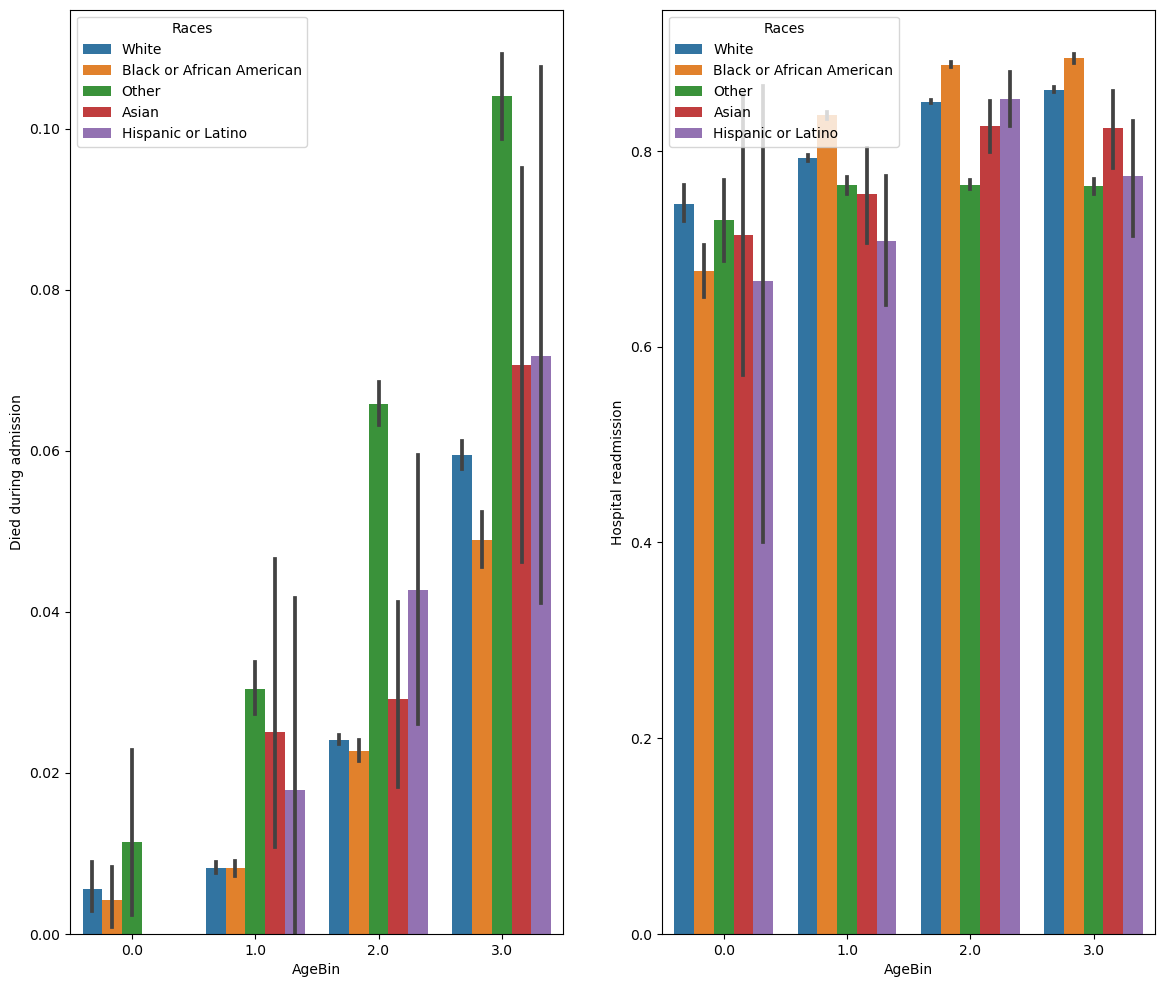

In [29]:
fig, qaxis = plt.subplots(1,2,figsize=(14,12))

sns.barplot(x = 'AgeBin', y = target, hue = 'Races', data=data, ax = qaxis[0])
sns.barplot(x = 'AgeBin', y = target2, hue = 'Races', data=data, ax = qaxis[1])


<Axes: xlabel='AgeBin', ylabel='Hospital readmission'>

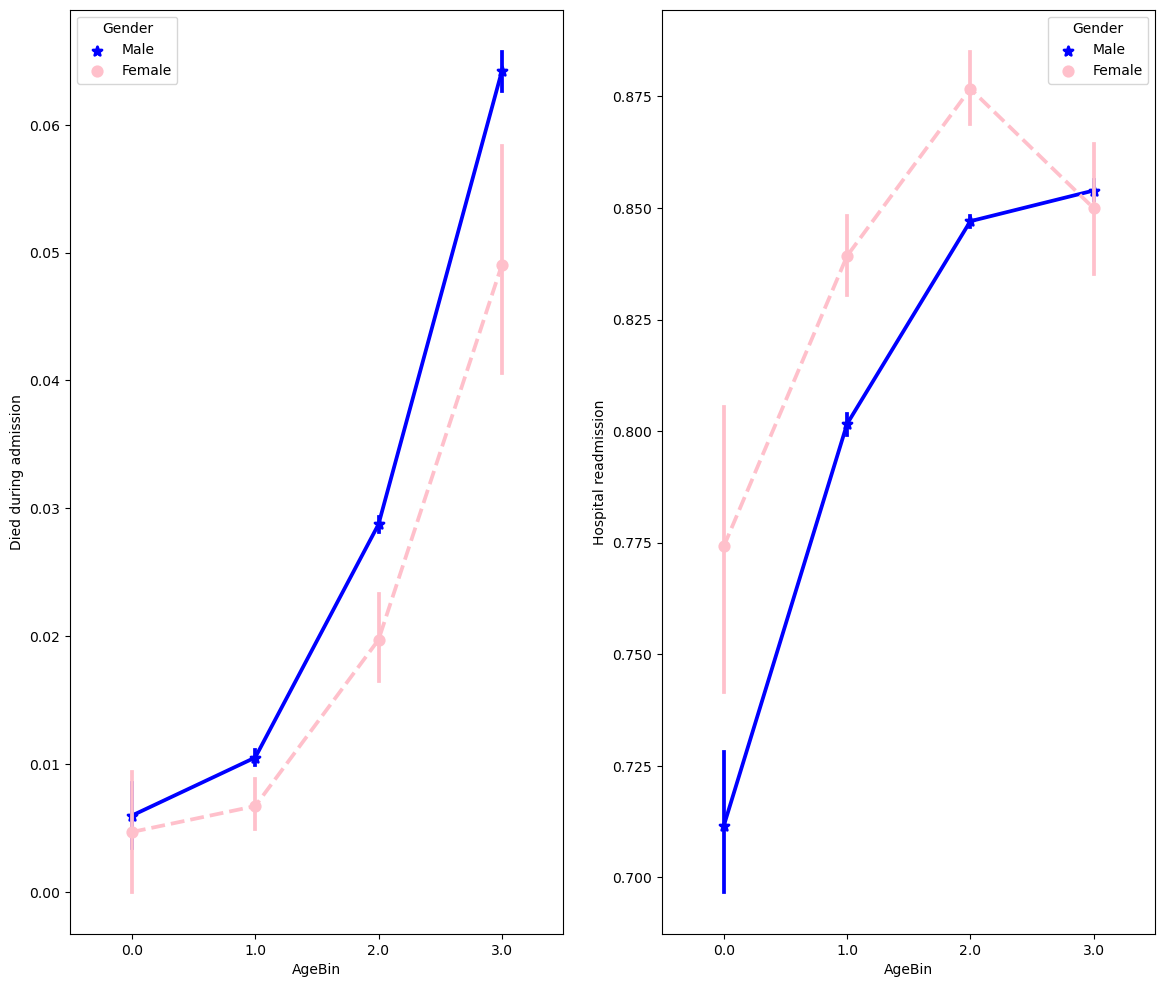

In [30]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Gender", data=data,
              palette={"Male": "blue", "Female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target2, hue="Gender", data=data,
              palette={"Male": "blue", "Female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

<Axes: xlabel='AgeBin', ylabel='Died during admission'>

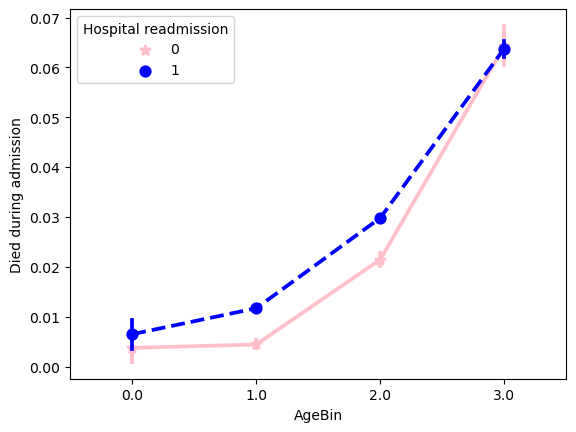

In [31]:
sns.pointplot(x="AgeBin", y=target, hue=target2, data=data,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

<Axes: xlabel='AgeBin', ylabel='Hospital readmission'>

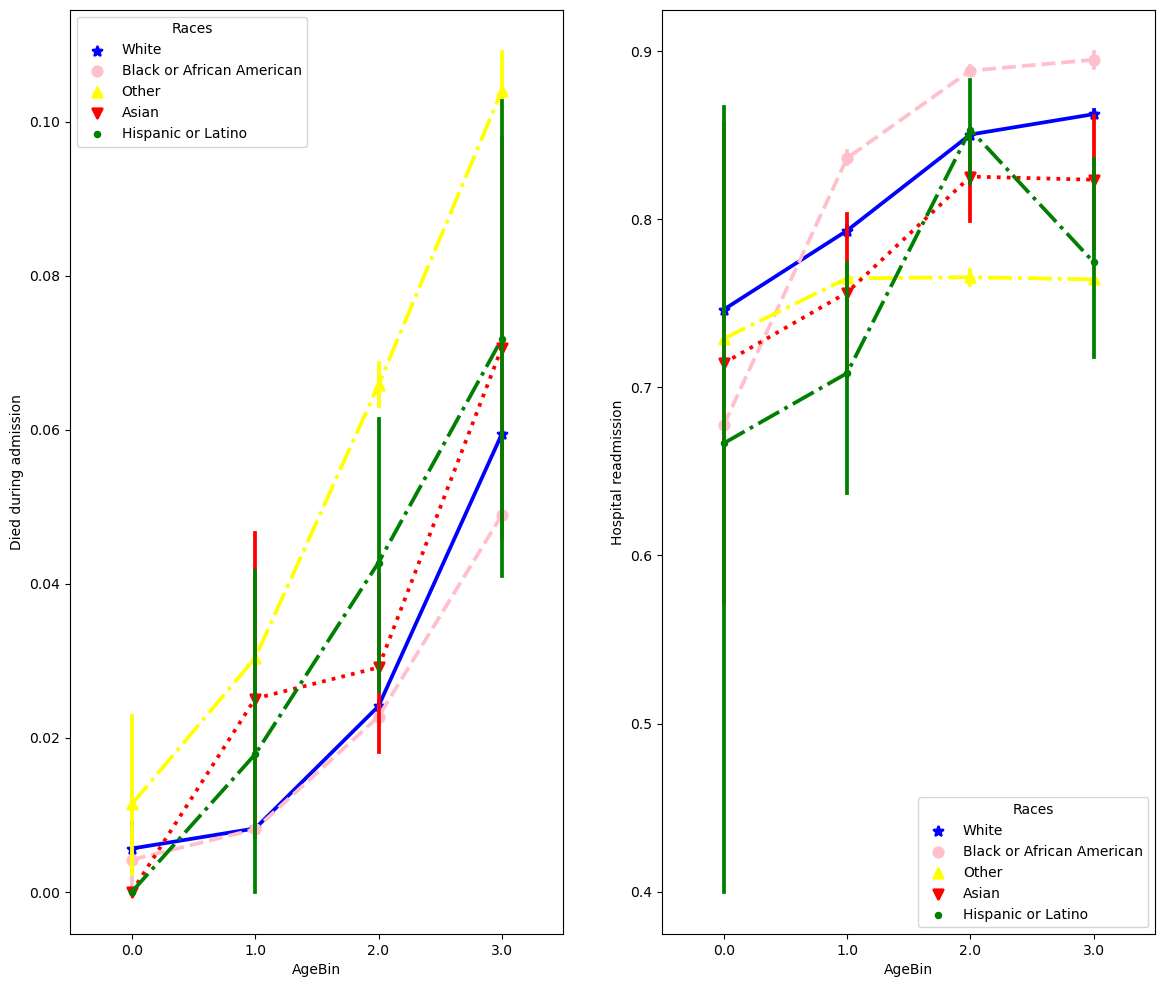

In [32]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does agebin factor with races & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Races", data=data,
              palette={'White': "blue", 'Black or African American': "pink", 'Asian':'red','Hispanic or Latino':'green','Other':'yellow'},
              markers=["*", "o","^",'v', '.'], linestyles=["-", "--", "-.",":",'-.'], ax = maxis1)

#how does class factor with races & readmission compare
sns.pointplot(x="AgeBin", y=target2, hue="Races", data=data,
              palette={'White': "blue", 'Black or African American': "pink", 'Asian':'red','Hispanic or Latino':'green','Other':'yellow'},
              markers=["*", "o","^",'v', '.'], linestyles=["-", "--", "-.",":",'-.'], ax = maxis2)

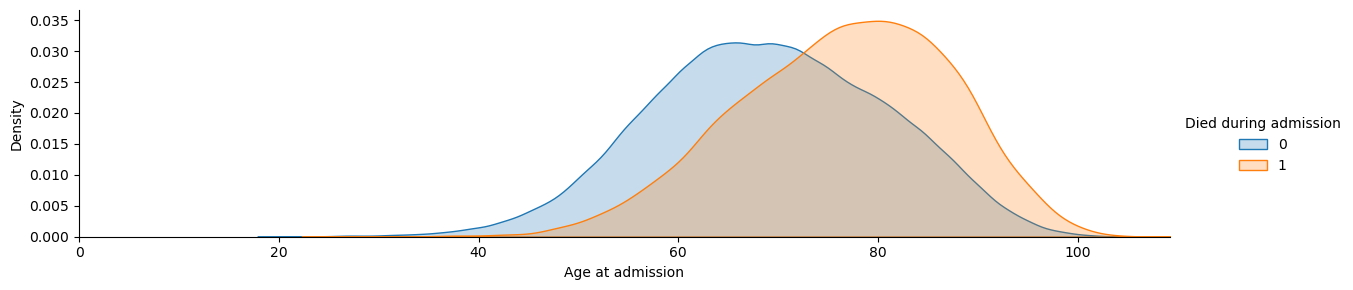

In [33]:
#plot distributions of age of patients who survived or did not survive
a = sns.FacetGrid( data, hue = target, aspect=4)
a.map(sns.kdeplot, 'Age at admission', fill= True )
a.set(xlim=(0 , data['Age at admission'].max()))
a.add_legend()

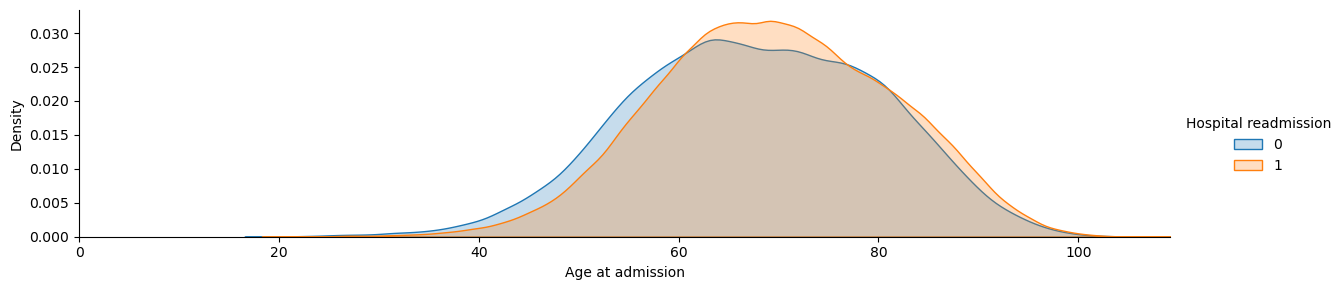

In [34]:
#plot distributions of age of patients who survived or did not survive
a = sns.FacetGrid( data, hue = target2, aspect=4)
a.map(sns.kdeplot, 'Age at admission', fill= True)
a.set(xlim=(0 , data['Age at admission'].max()))
a.add_legend()

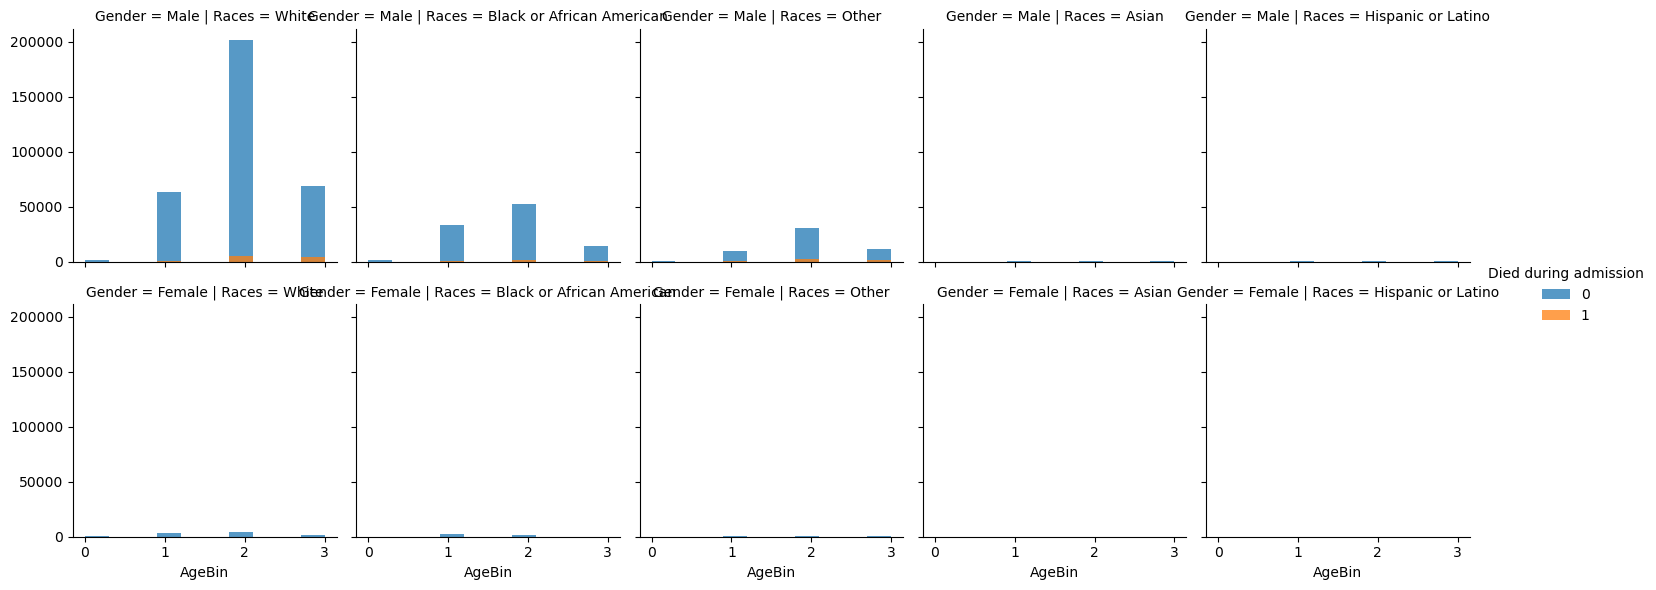

In [35]:
#histogram comparison of gender,races, and age by survival
h = sns.FacetGrid(data, row = 'Gender', col = 'Races', hue = target)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

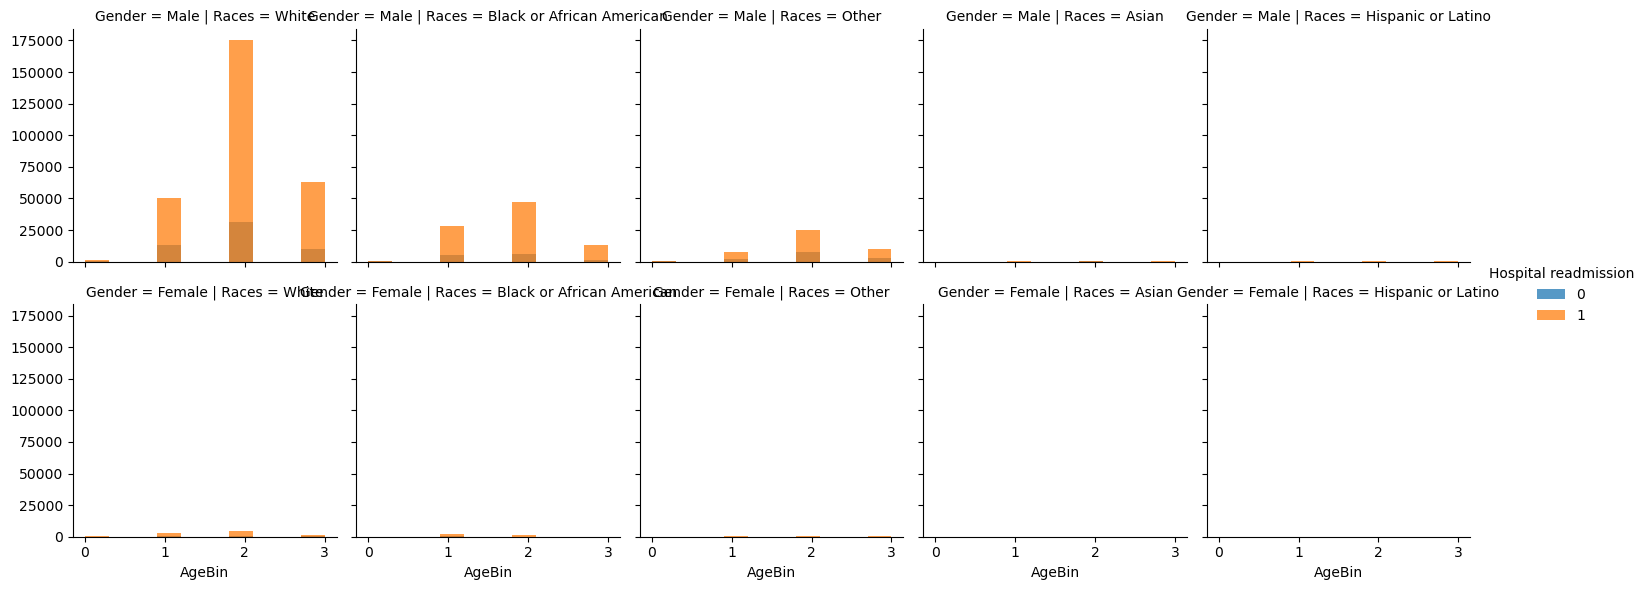

In [36]:
#histogram comparison of gender,races, and age by readmisison
h = sns.FacetGrid(data, row = 'Gender', col = 'Races', hue = target2)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

/tmp/ipykernel_29523/3295368943.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


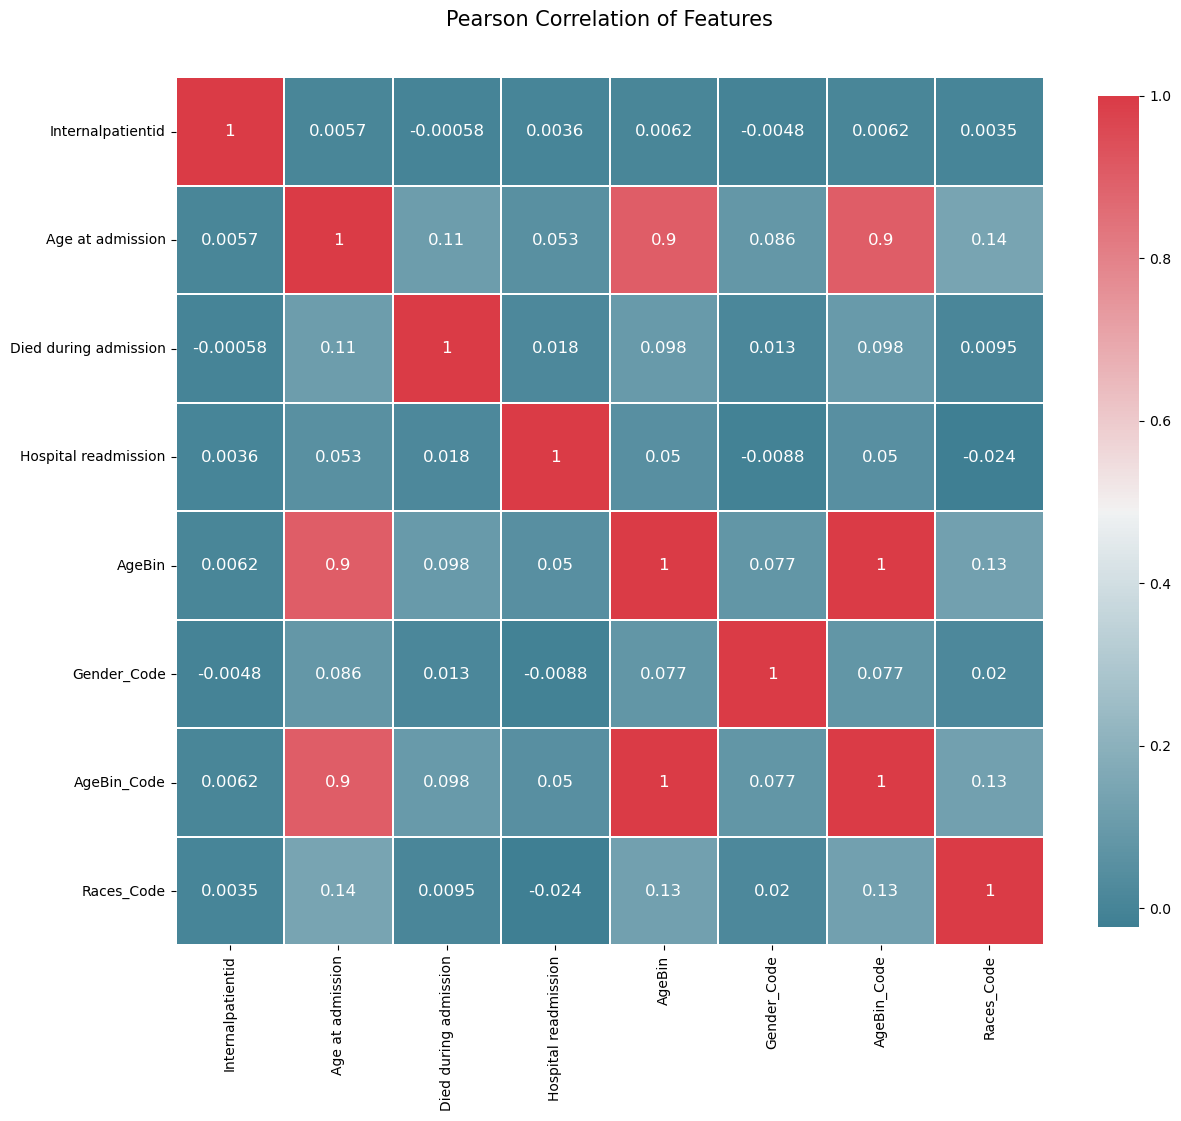

In [37]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_enth2)

Canonical Correlation

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

scaler = StandardScaler()
X = inpatient_enth2[['Age at admission','Races_Code']]
Y = inpatient_enth2[[target, target2]]

X1 = scaler.fit_transform(X)
Y1 = scaler.fit_transform(Y)

cca = CCA(n_components=2)
cca.fit(X1, Y1)

X_c, Y_c = cca.transform(X, Y)

#comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(2)]
print(cca.x_loadings_)

[[ 1.00963988  0.15676509]
 [-0.01813793  0.98763592]]


/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but CCA was fitted without feature names
  warnings.warn(


In [119]:
print(cca.y_loadings_)

[[ 0.88770364  0.45135328]
 [ 0.46053014 -0.89234535]]


In [120]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [Y.columns])
coef_df.index = X.columns
coef_df 

/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


,Died during admission,Hospital readmission
Age at admission,0.88,0.44
Races_Code,0.32,-0.97
